<p align="center">
<a href="" rel="noopener">
<img src="https://user-images.githubusercontent.com/46085301/212309825-fb31ef54-8b2d-4907-a39d-59e479234797.png" height="75" width="50"/>
<a/>
<a href="" rel="noopener">
 <img src="https://user-images.githubusercontent.com/46085301/212293448-4a4694ed-635a-4023-800b-636de8477bf9.png" alt="TSF | Graduate Rotational Internship Program "></a>
</p>

# Iris Species Prediction using Decision Tree Algorithm

Iris Species Prediction using Decision Tree Algorithm is a machine learning task of classifying the species of Iris flowers based on their physical characteristics. This task involves training a Decision Tree model on the Iris dataset, which includes measurements of sepal length, sepal width, petal length, and petal width for 150 Iris flowers of three different species: Iris setosa, Iris virginica, and Iris versicolor. The trained model is then used to predict the species of new, unseen Iris flowers based on their measurements.

### Author: Bhimraj Yadav
Prediction using Decision Tree Algorithm
(Level - Intermediate)

Task: 
 - Create the Decision Tree classifier and visualize it graphically.
 - The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly. 


## Data Preparation

In [1]:
#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# imporing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset into a pandas dataframe
df = pd.read_csv('dataset/Iris.csv')

# dropping ID column
df.drop(columns=['Id'],axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# checking for null values
print(df.isnull().sum())

df.info()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# class counts
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Visualizaion

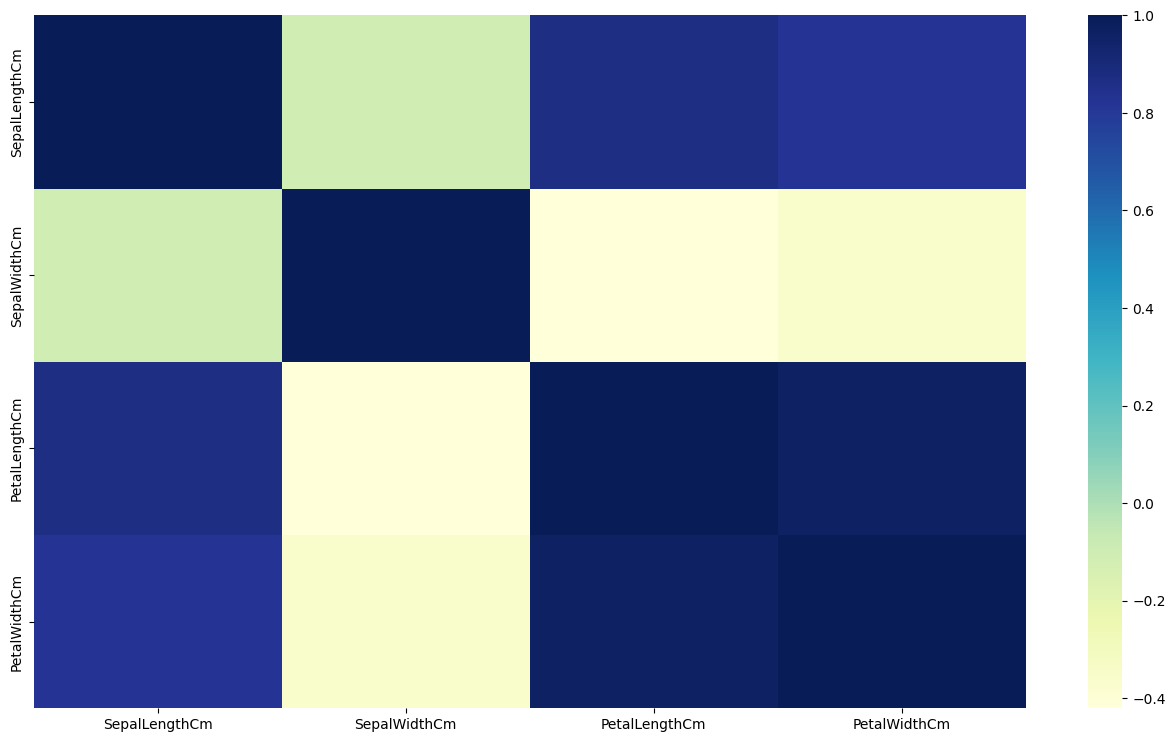

In [6]:
# checking correlaion
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap='YlGnBu')
plt.show()

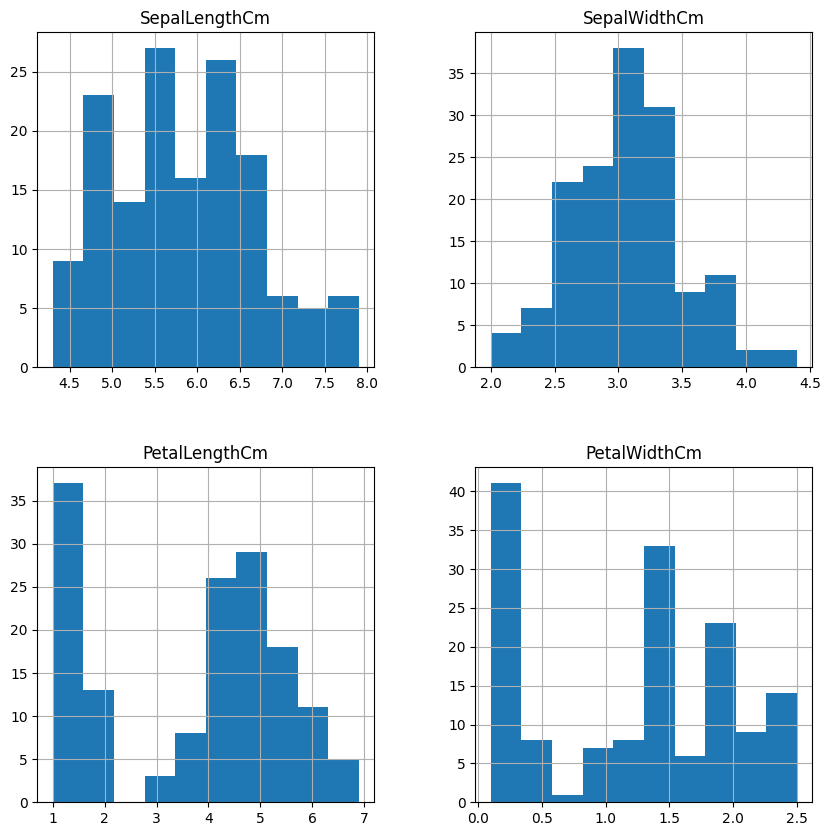

In [7]:
# Creating histogram to visualize the distribution of each independent features
df.hist(figsize=(10,10))
plt.show()

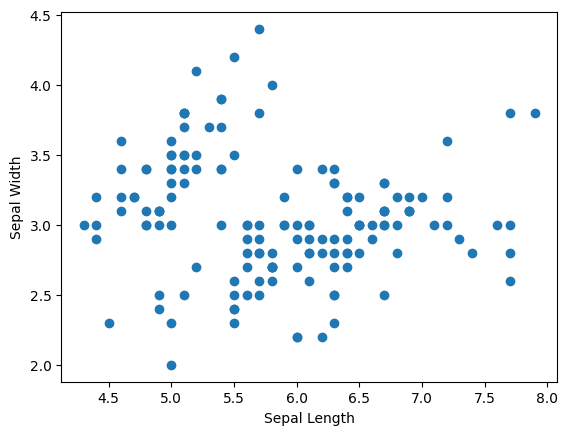

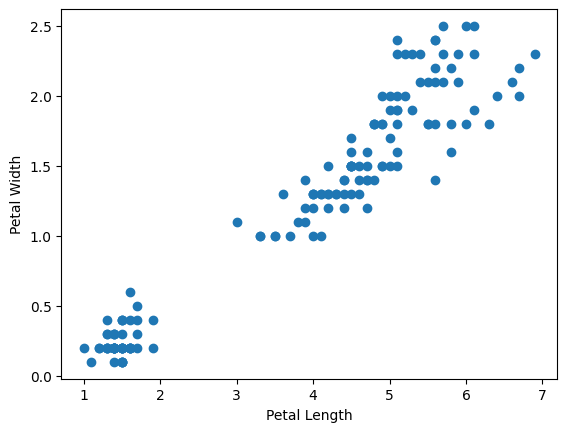

In [8]:
# Create scatterplots to visualize the relationships between variables/features
plt.scatter(df["SepalLengthCm"], df["SepalWidthCm"])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

plt.scatter(df["PetalLengthCm"], df["PetalWidthCm"])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

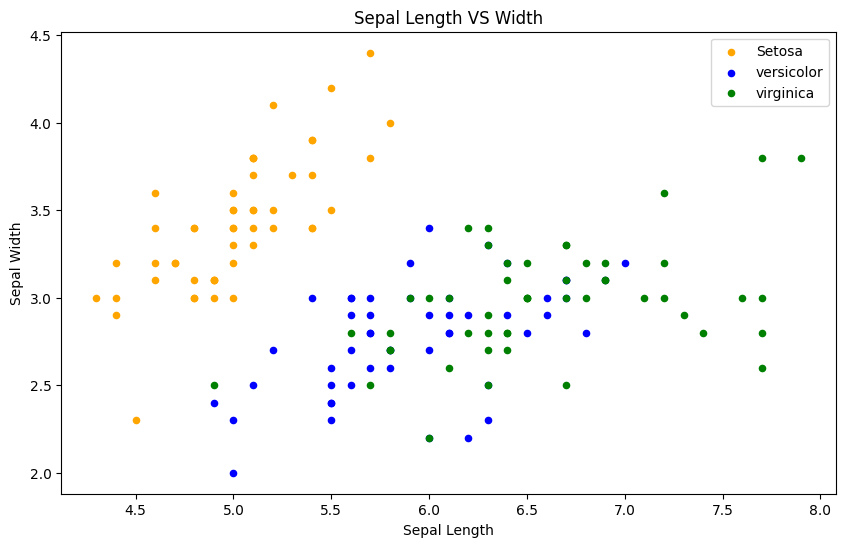

In [9]:
fig = df[df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

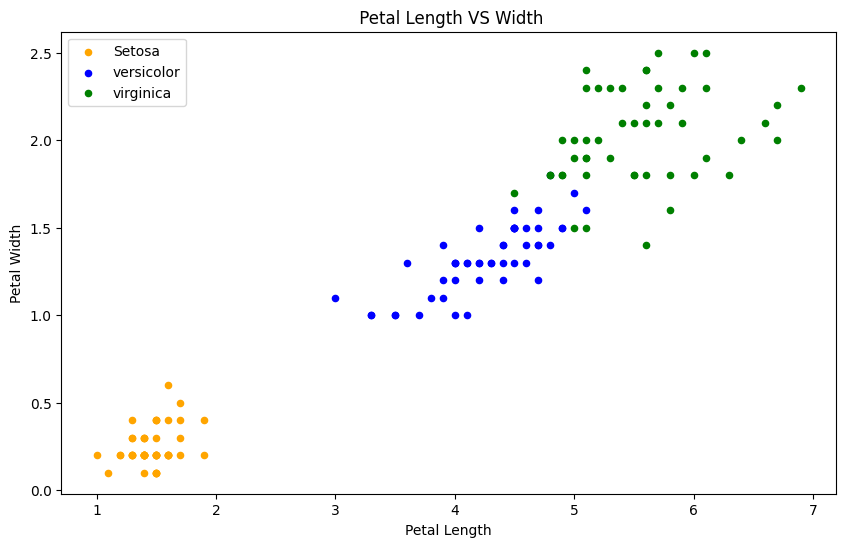

In [10]:
fig = df[df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

<AxesSubplot: xlabel='Species', ylabel='SepalWidthCm'>

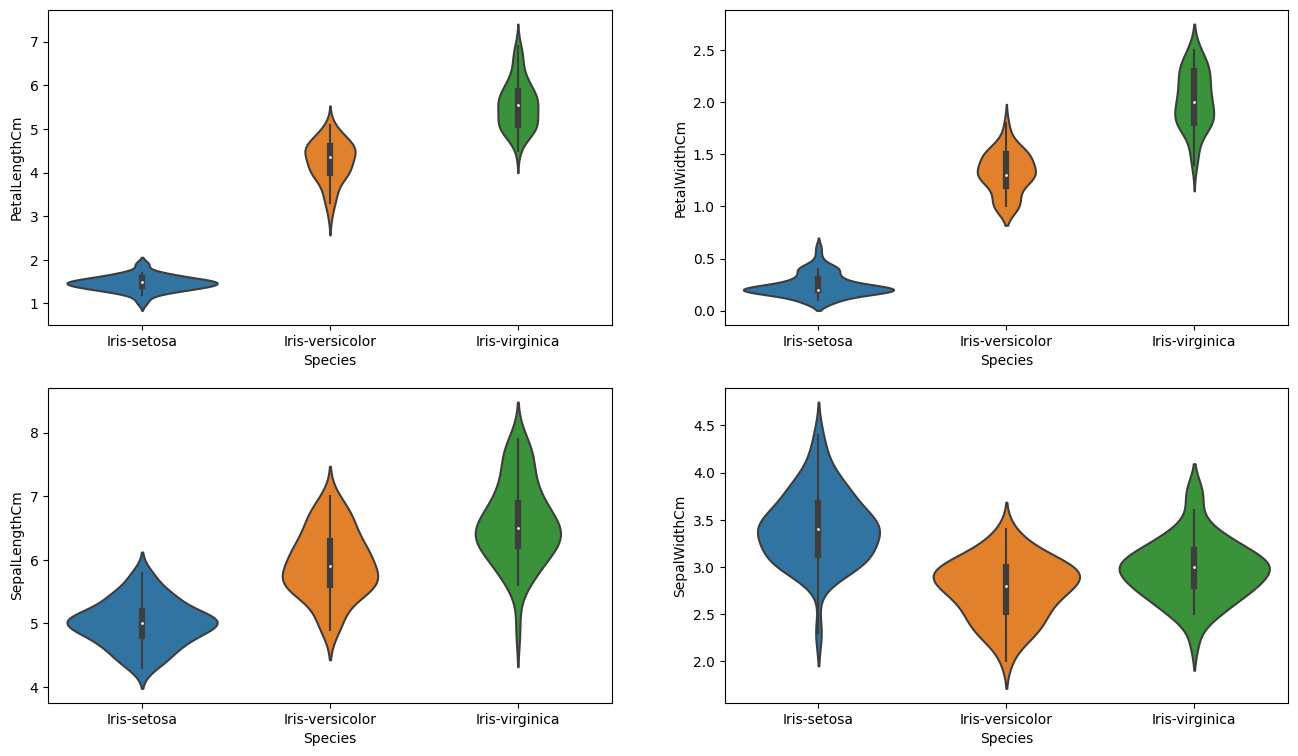

In [11]:
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)


The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

<AxesSubplot: xlabel='Species', ylabel='PetalLengthCm'>

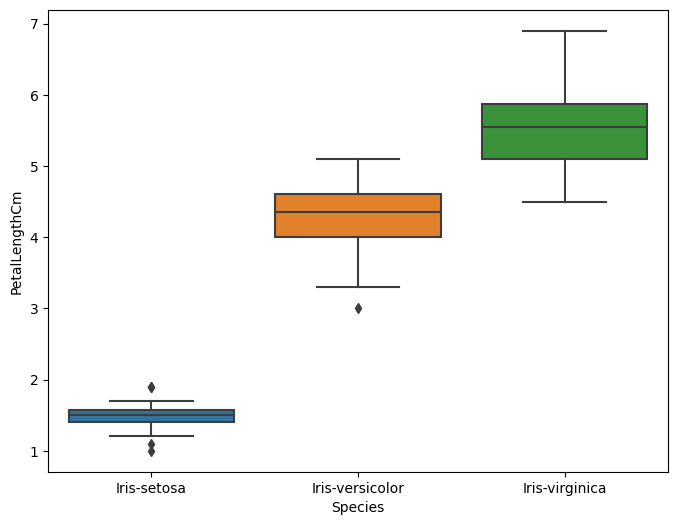

In [12]:
# We can look at an individual feature in Seaborn through a boxplot and look for outliers
plt.figure(figsize=(8,6))
sns.boxplot(x="Species", y="PetalLengthCm", data=df)

<AxesSubplot: xlabel='Species', ylabel='PetalWidthCm'>

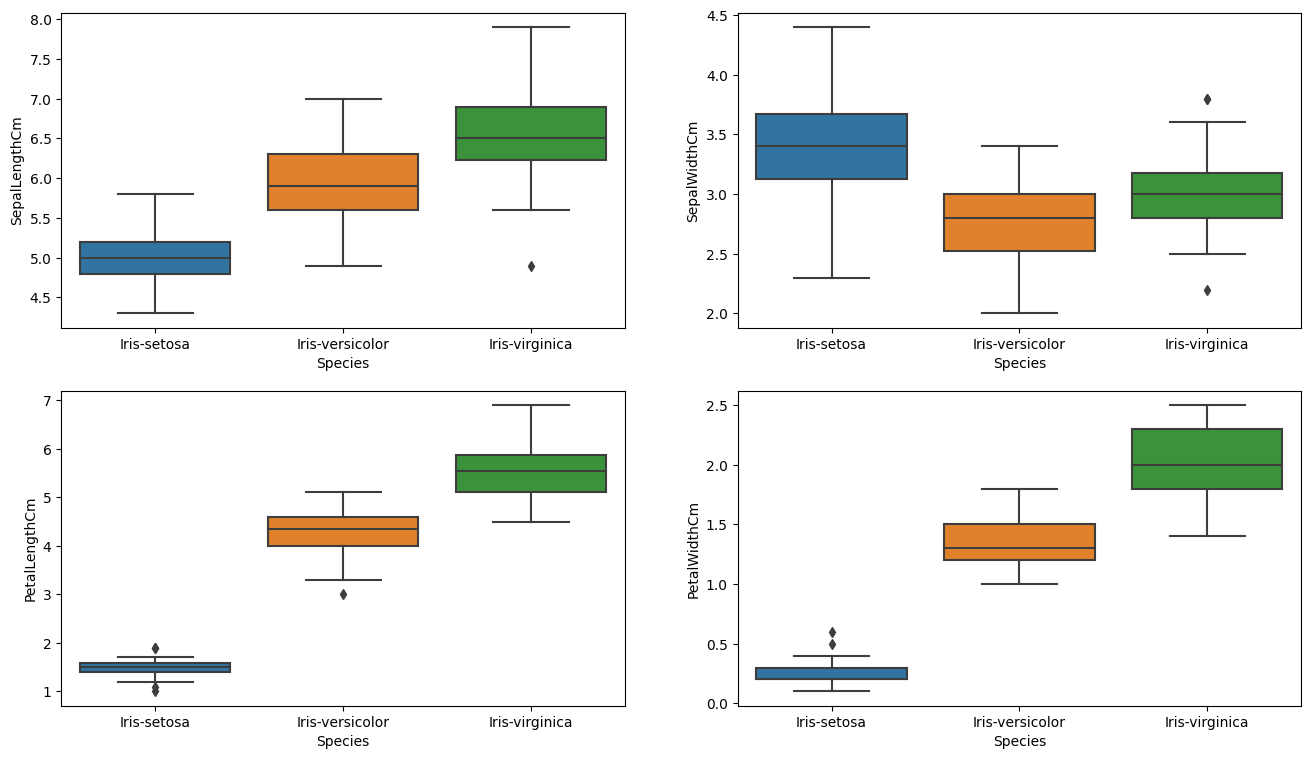

In [13]:
plt.figure(figsize=(16,9))
plt.subplot(2,2,1)
sns.boxplot(x="Species", y="SepalLengthCm", data=df)
plt.subplot(2,2,2)
sns.boxplot(x="Species", y="SepalWidthCm", data=df)
plt.subplot(2,2,3)
sns.boxplot(x="Species", y="PetalLengthCm", data=df)
plt.subplot(2,2,4)
sns.boxplot(x="Species", y="PetalWidthCm", data=df)

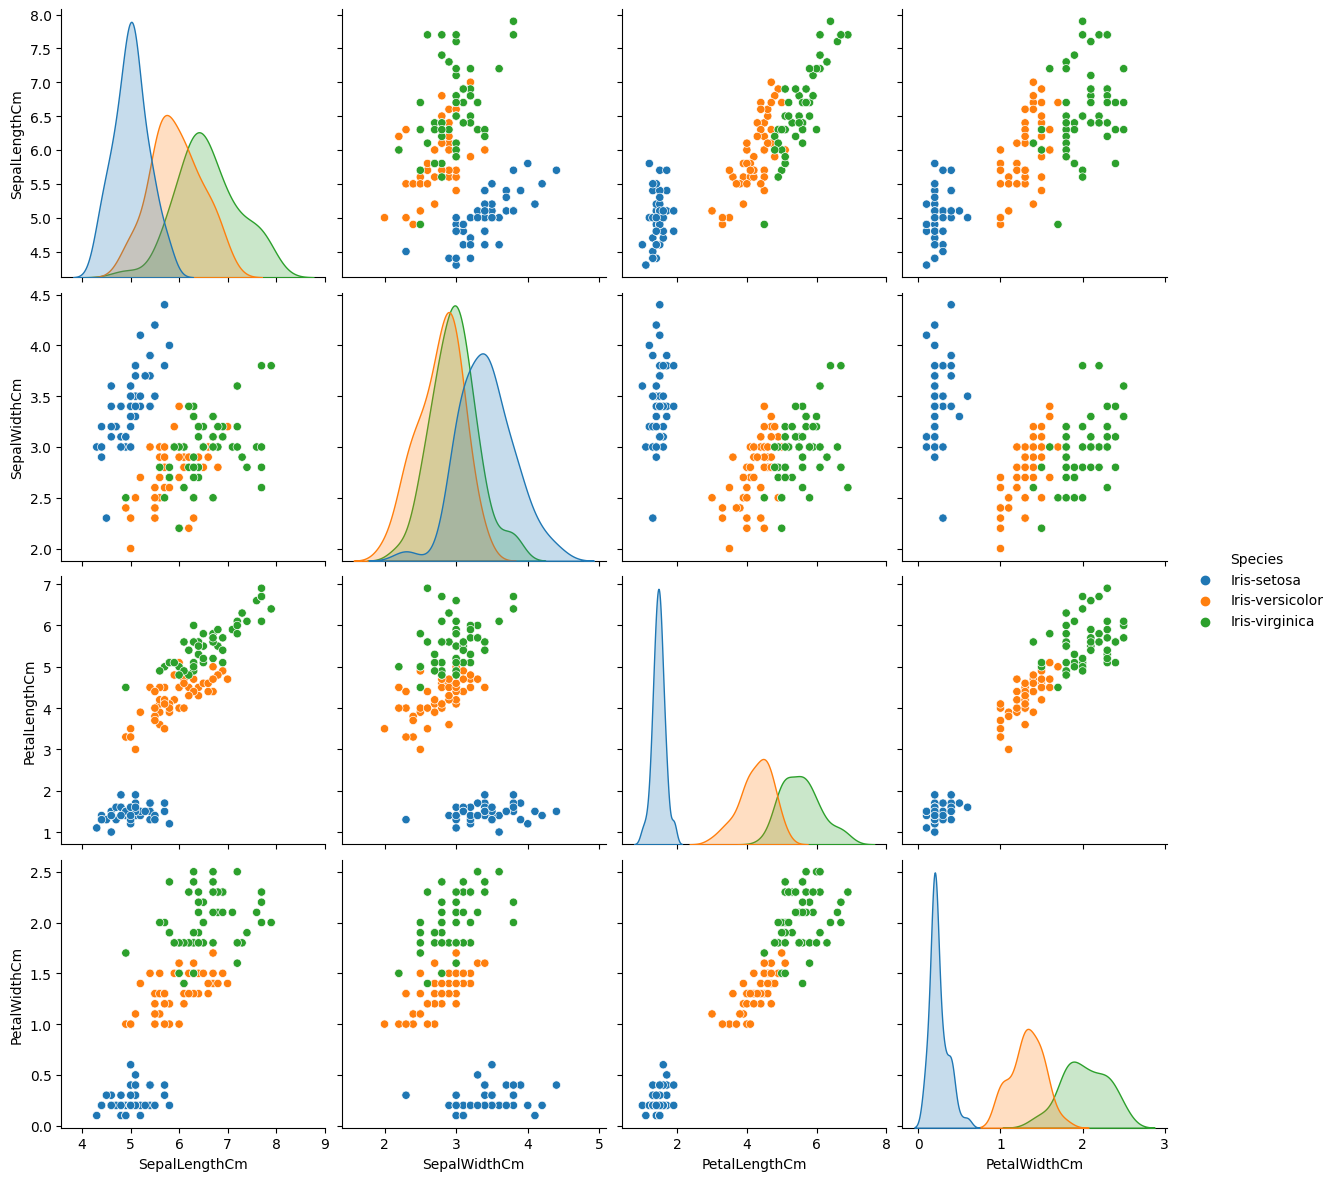

In [14]:
sns.pairplot(df, hue="Species", height=3)

## Model Training:

In [15]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

le = preprocessing.LabelEncoder()

X = df.drop(columns=['Species'],axis=1)

le.fit(df['Species'])

y = le.transform(df['Species'])


In [16]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [18]:
model = DecisionTreeClassifier(criterion='entropy', random_state=20)  

model.fit(X_train,y_train) 

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test) 

print('The test accuracy of the Decision Tree is:',metrics.accuracy_score(y_test_pred,y_test))

The test accuracy of the Decision Tree is: 0.98


## Model Evaluation:

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

# train data report
print(classification_report(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        34

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [20]:
# test data report
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



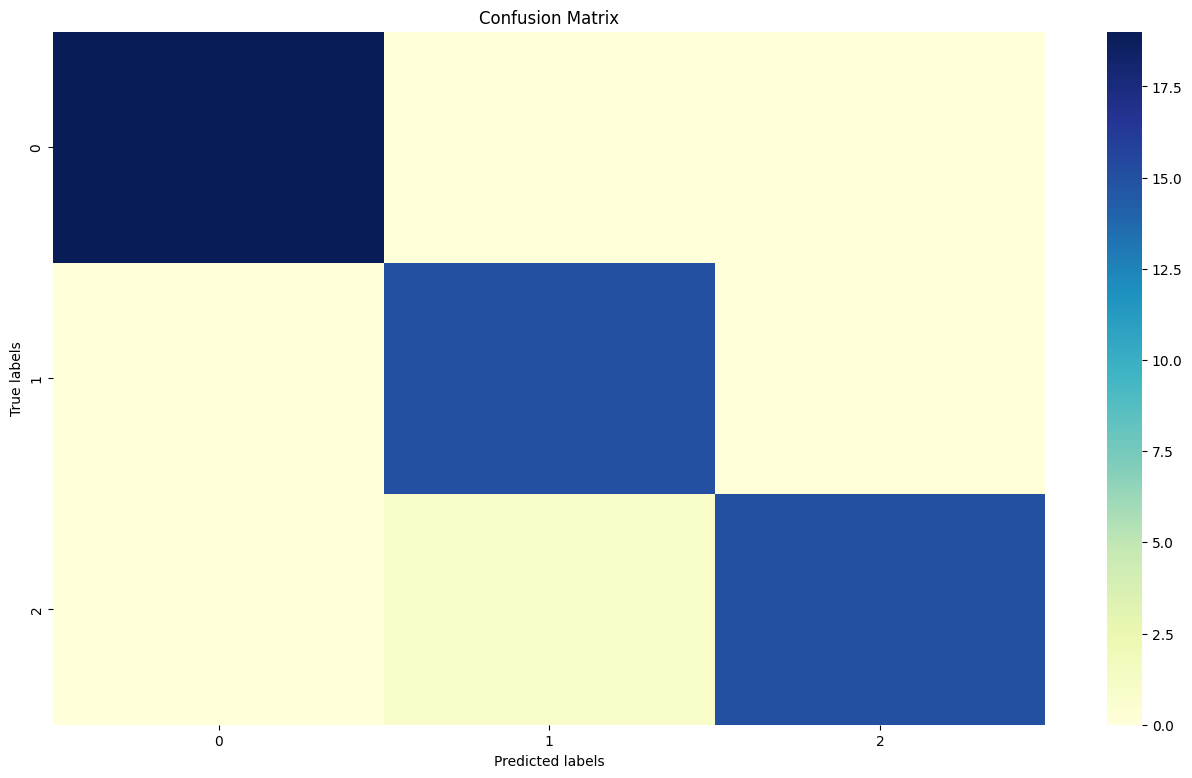

In [21]:
# confusion matrix
plt.figure(figsize=(16,9))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, cmap='YlGnBu')

# Add labels to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

<AxesSubplot: >

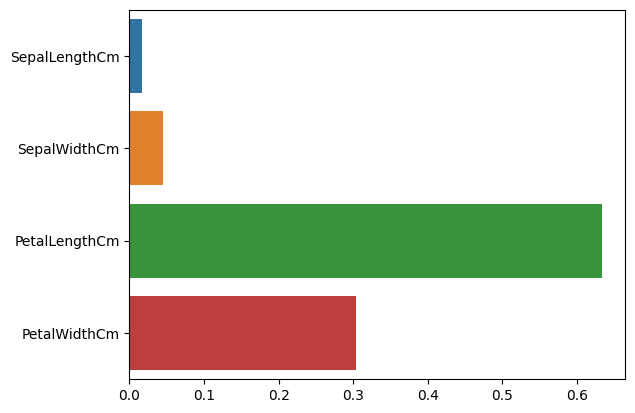

In [22]:
# Bar plot of feature importances
importances = model.feature_importances_
sns.barplot(x=importances, y=X.columns)

In [23]:
# Predict on new data 

new_data_points=[1.3,2.2,4.4,4.2]
prediction = model.predict([new_data_points])[0]

print("The predicted class for new datapoint is: ",le.classes_[prediction])

The predicted class for new datapoint is:  Iris-virginica


## Visualize the model

Features: ['SepalLengthCm' 'SepalWidthCm' 'PetalLengthCm' 'PetalWidthCm'] 
 Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


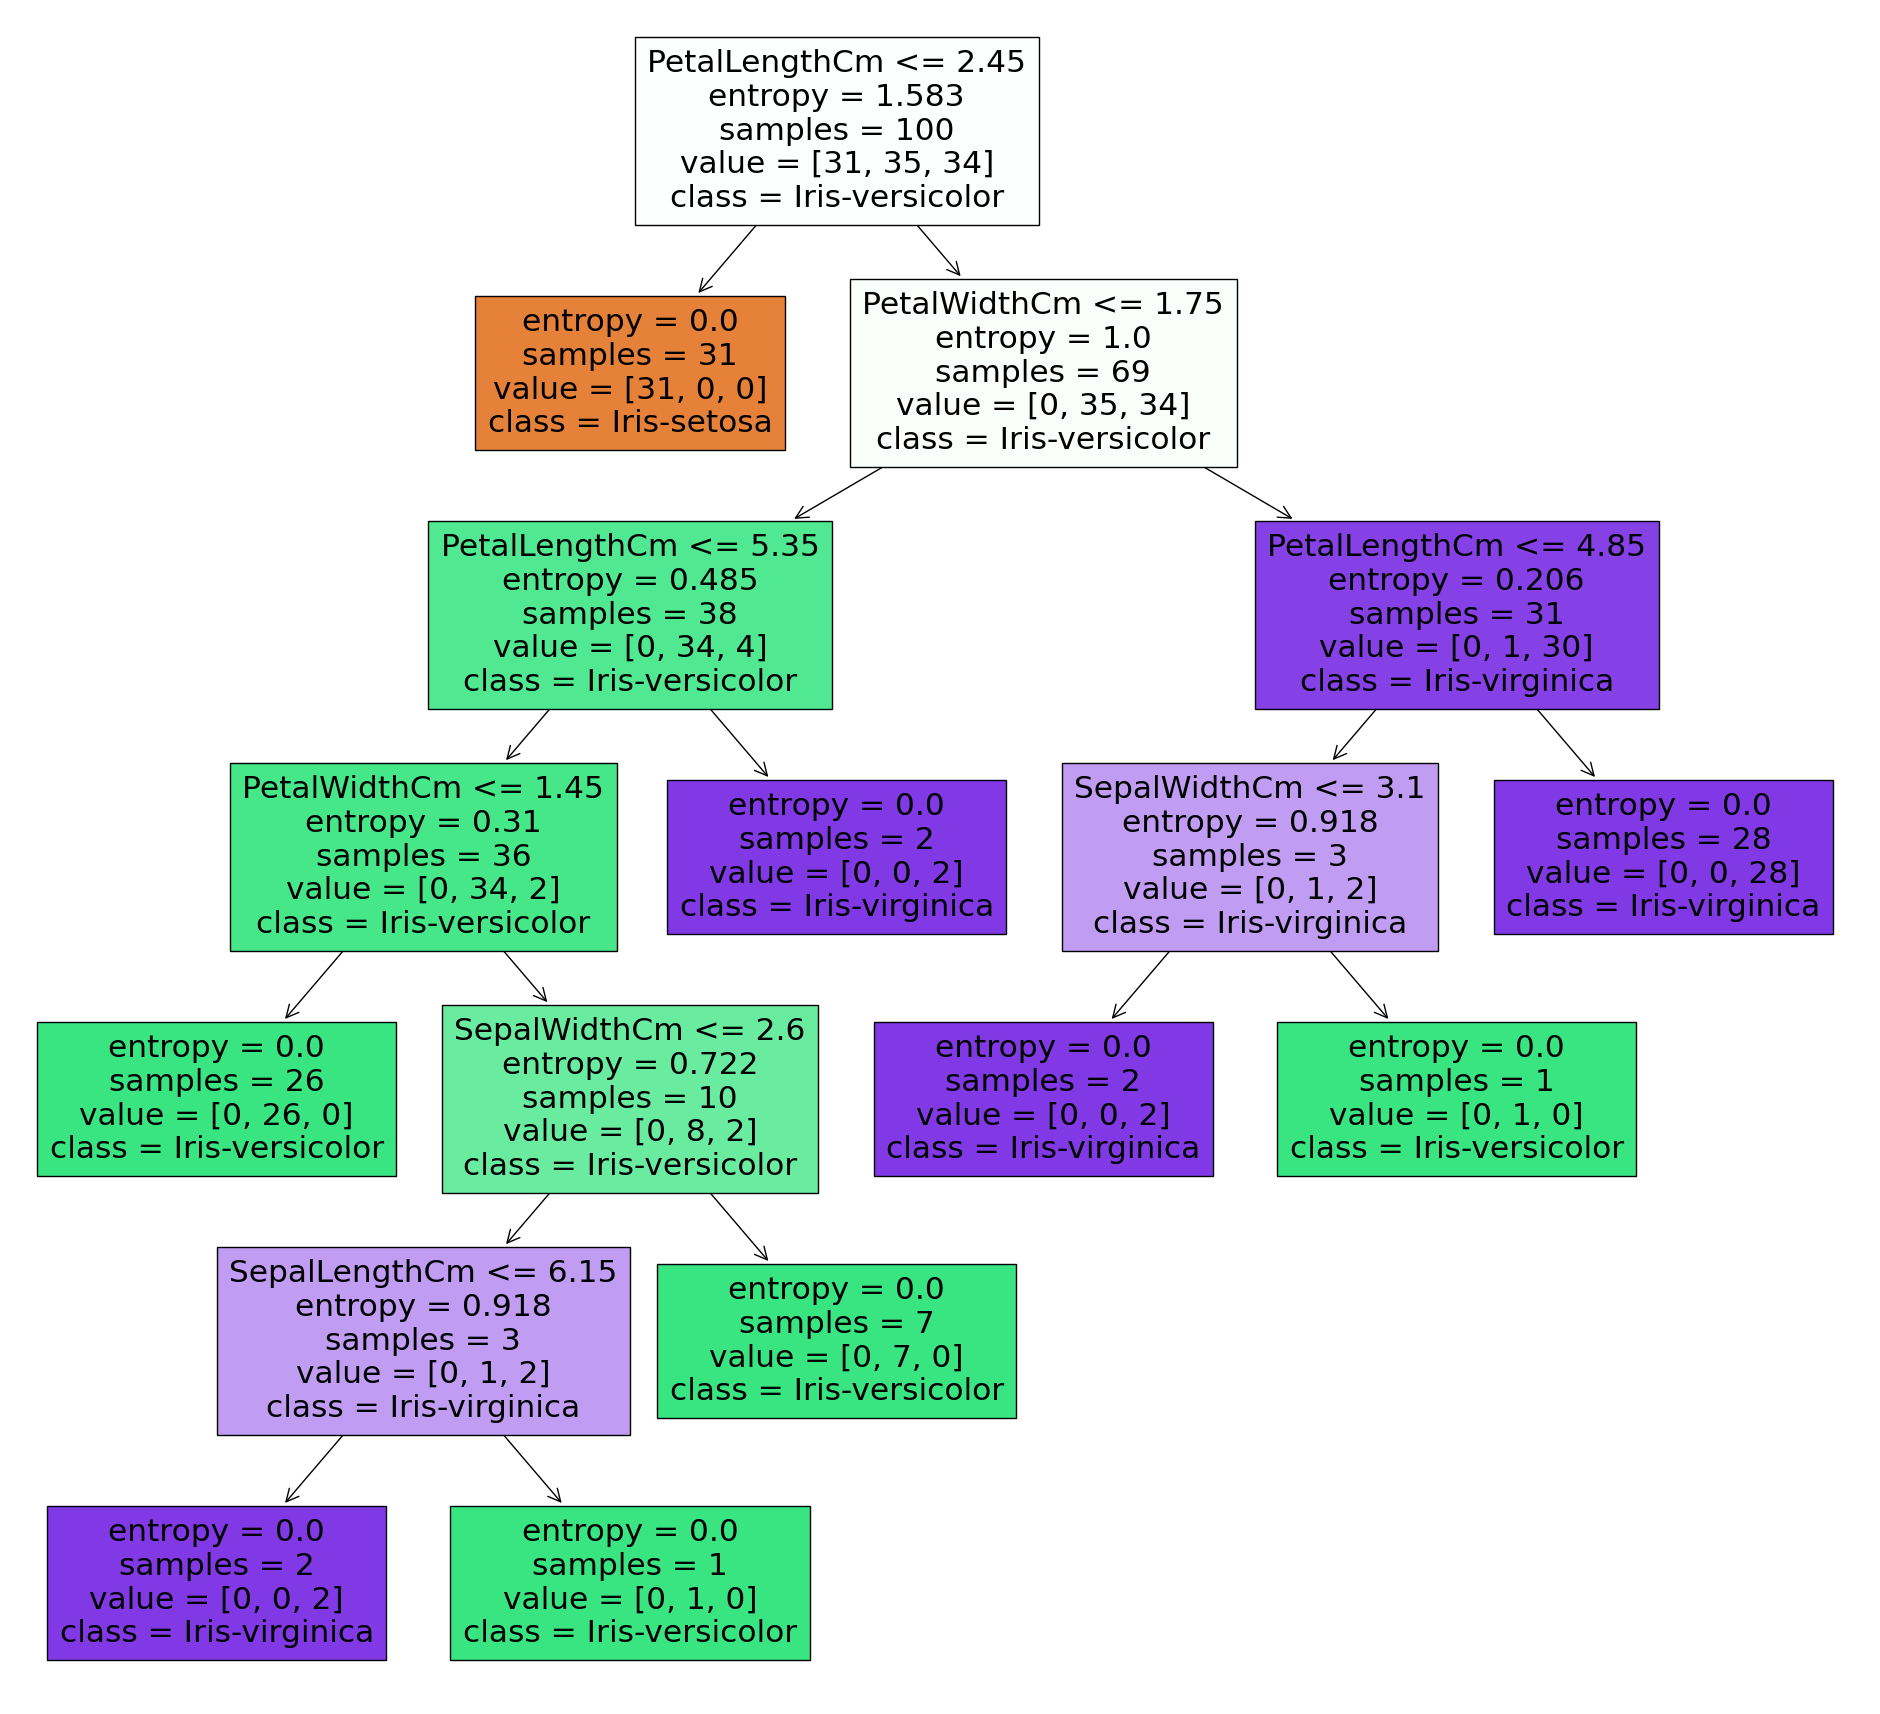

In [24]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(24,22))

features = X.columns.values
classes = le.classes_
print(f'Features: {features} \n Classes: {classes}')

plot_tree(model,
               feature_names = features, 
               class_names= classes,
               filled = True);

## Saving and Loading the model

### Using joblib

In [25]:
import joblib
joblib.dump(model, 'model.joblib')

['model.joblib']

In [26]:
classifier = joblib.load('model.joblib') 
classifier.predict([new_data_points])

array([2])

### Using pickle

In [27]:
import pickle
with open('iris_classifier.pkl', 'wb') as file:
    pickle.dump(model, file)

In [28]:
iris_classifier = pickle.load(open('iris_classifier.pkl', 'rb'))
iris_classifier.predict([[1.2, 4.5, 3.5, 4.6]])

array([1])